<a href="https://colab.research.google.com/github/maglili/MNIST/blob/main/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Part I] Pytorch 基礎教學

**[Note]**
執行時請先將執行階段改成 GPU 加速運算。

<small>更改方式: 執行階段> 變更執行階段類型> 硬體加速器選擇GPU> 儲存</small>

**Pytorch document:**

在一開始還不熟 function 時，看官方的解釋可以快速了解用法。

Layers:
- [conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
- [MaxPool2d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d)
- [Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#torch.nn.Flatten)
- [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)
- [BatchNorm2d (optional)](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html#torch.nn.BatchNorm2d)
- [Dropout (optional)](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)


Activation function:
- [Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid)
- [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)
- [Tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#torch.nn.Tanh)


## Convolution

### 實際例子
不必細看程式碼，只要關注在輸出結果就好。

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



原始圖片:


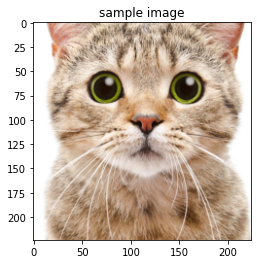

In [ ]:
import torch
torch.manual_seed(0) # keep random seed
import urllib
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True) # 載入resnet
model.eval();

url, filename = ("https://wallpaperaccess.com/full/2773879.jpg", "cat.jpg") # download image

try:
  urllib.URLopener().retrieve(url, filename)
except:
  urllib.request.urlretrieve(url, filename)

input_image = Image.open(filename)

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
print('原始圖片:')
plt.imshow(input_tensor.permute(1,2,0).cpu().detach().numpy())
plt.title('sample image')
plt.show()


[印出前 8 個 kernel 以及過完這個 kernel 的圖片]:



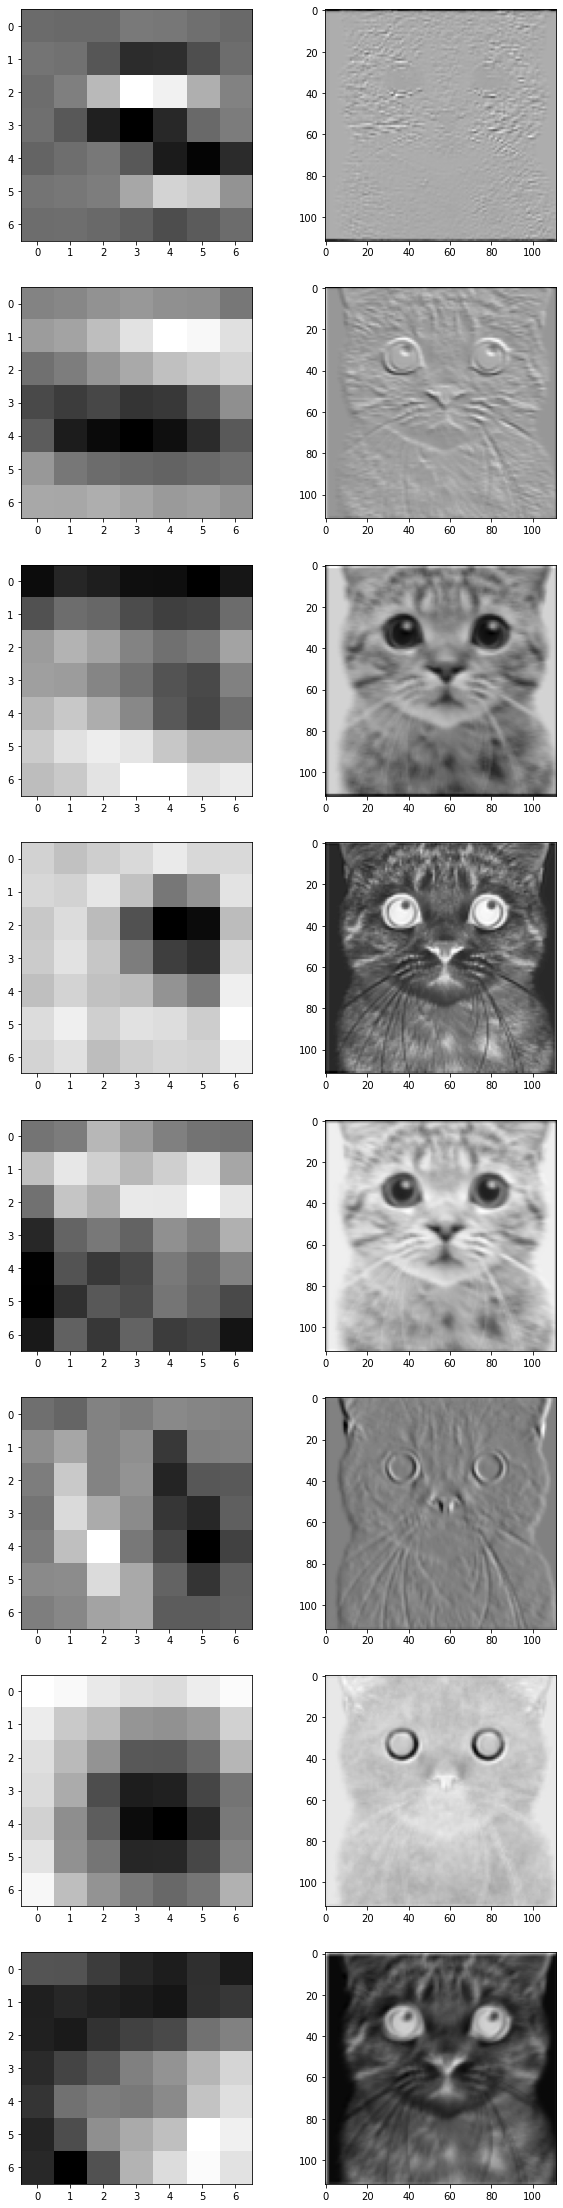

In [ ]:
import matplotlib.pylab as plt # plot module
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

conv_layer = model.conv1 # 從resnet 的 conv1 提取kernel，共有64個kernel

conv_images = conv_layer(input_batch) # 把圖片丟入 conv_layer 中，得出卷積結果
kernel_images = conv_layer.state_dict()['weight'].cpu().detach().numpy() # 把 kernel 提取出來
print('\n[印出前 8 個 kernel 以及過完這個 kernel 的圖片]:\n')

fig=plt.figure(figsize=(10, 40))
columns = 2
rows = 8
for i in range(1, columns//2 * rows + 1):
    kernel = rgb2gray(kernel_images[i-1].transpose(1, 2, 0))
    img = conv_images[0][i-1].cpu().detach().numpy()
    fig.add_subplot(rows, columns, 2*i-1)
    plt.imshow(kernel, cmap='gray')
    fig.add_subplot(rows, columns, 2*i)
    plt.imshow(img, cmap='gray')

plt.show()

### 實作

創造卷積層

In [ ]:
import torch
import torch.nn as nn

input = torch.rand(1,1,3,3) # 輸入矩陣 [batch,channel,w,h]
print('輸入:\n',input)
print()

conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2) # 實體化卷積層
print('kernel and bias:\n',conv_layer.state_dict())

輸入:
 tensor([[[[0.8865, 0.2111, 0.7821],
          [0.7007, 0.1989, 0.5453],
          [0.2138, 0.9049, 0.0345]]]])

kernel and bias:
 OrderedDict([('weight', tensor([[[[-0.0430, -0.0678],
          [ 0.2051, -0.0561]]]])), ('bias', tensor([-0.0599]))])


輸出結果

In [ ]:
output = conv_layer(input)
output

tensor([[[[ 0.0203, -0.1117],
          [-0.1103,  0.0782]]]], grad_fn=<ThnnConv2DBackward>)

## Pooling

實際例子


[印出前 8 個過完 convolution 以及再過完 max pooling 的圖片]:



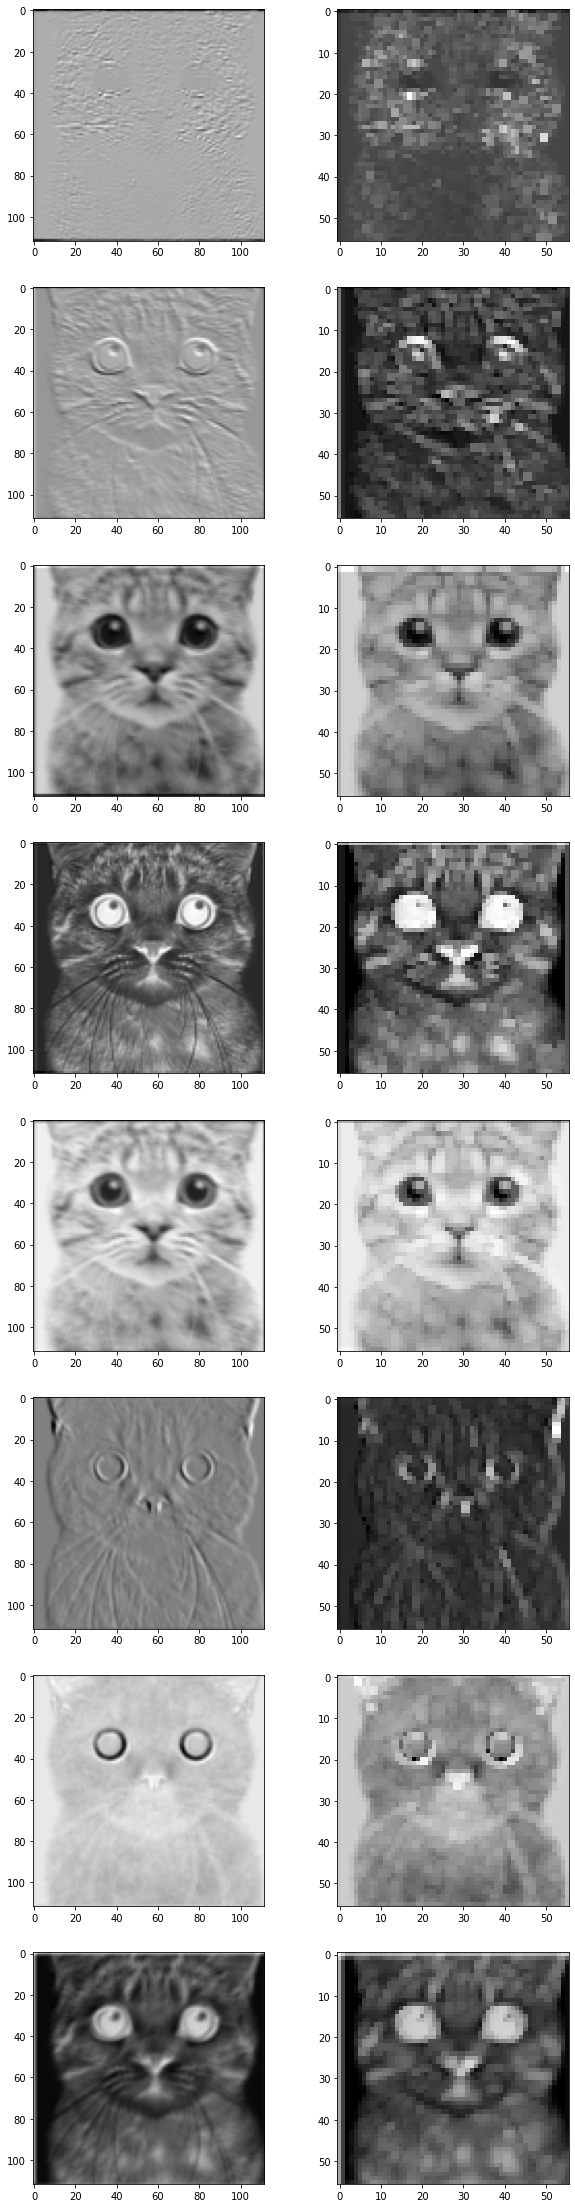

In [ ]:
maxpool_layer = model.maxpool # 提取 resnet 中的 maxpool 層
maxpool_images = maxpool_layer(conv_images) # 將過完 convolution 後的圖片丟入 maxpool 層，得到結果
print('\n[印出前 8 個過完 convolution 以及再過完 max pooling 的圖片]:\n')

fig=plt.figure(figsize=(10, 40))
columns = 2
rows = 8
for i in range(1, columns//2 * rows + 1):
    img = conv_images[0][i-1].cpu().detach().numpy()
    maxpool_img = maxpool_images[0][i-1].cpu().detach().numpy()
    fig.add_subplot(rows, columns, 2*i-1)
    plt.imshow(img, cmap='gray')
    fig.add_subplot(rows, columns, 2*i)
    plt.imshow(maxpool_img, cmap='gray')

plt.show()

宣告一個矩陣，代表圖片

In [ ]:
image1=torch.zeros(1,1,4,4)
image1[0,0,0,:]=torch.tensor([1.0,2.0,3.0,-4.0])
image1[0,0,1,:]=torch.tensor([0.0,2.0,-3.0,0.0])
image1[0,0,2,:]=torch.tensor([0.0,2.0,3.0,1.0])
image1

tensor([[[[ 1.,  2.,  3., -4.],
          [ 0.,  2., -3.,  0.],
          [ 0.,  2.,  3.,  1.],
          [ 0.,  0.,  0.,  0.]]]])

輸出結果

In [ ]:
max1=torch.nn.MaxPool2d(2) # 實體化池化層
max1(image1)

tensor([[[[2., 3.],
          [2., 3.]]]])

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%206/6.1.3_max_pool_animation_2.gif" width = 500, align = "center">


## Flatten

宣告輸入

In [ ]:
image = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]]])
image

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

輸出結果(矩陣被攤平)

In [ ]:
m = nn.Flatten() # 實體化Flatten層
m(image)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

## Fully connected layer

In [ ]:
input = torch.tensor([[1,2,3,4,5]]).float()
print('input:',input)

fc = nn.Linear(5,1) # 實體化全連接層

input: tensor([[1., 2., 3., 4., 5.]])


輸出結果

In [ ]:
output = fc(input)
output

tensor([[0.1054]], grad_fn=<AddmmBackward>)

## Activation layer

In [ ]:
input = torch.tensor([[-5,-1,0,3,8]]).float()
print('Input:',input)
print('-'*50)

relu = nn.ReLU() # 實體化ReLU層
out1 = relu(input)
print('ReLU:', out1)

tanh = nn.Tanh() # 實體化Tanh層
out2 = tanh(input)
print('Tanh:', out2)

sigmoid = nn.Sigmoid() # 實體化sigmoid層
out3 = sigmoid(input)
print('Sigmoid:', out3)

print('-'*50)
softmax = nn.Softmax(dim=1)  # 實體化Softmax層
out4 = softmax(input)
print('Softmax:', out4)

Input: tensor([[-5., -1.,  0.,  3.,  8.]])
--------------------------------------------------
ReLU: tensor([[0., 0., 0., 3., 8.]])
Tanh: tensor([[-0.9999, -0.7616,  0.0000,  0.9951,  1.0000]])
Sigmoid: tensor([[0.0067, 0.2689, 0.5000, 0.9526, 0.9997]])
--------------------------------------------------
Softmax: tensor([[2.2442e-06, 1.2253e-04, 3.3306e-04, 6.6898e-03, 9.9285e-01]])


# [Part II] LeNet-5 實作 

**LeNet-5 架構:**
<hr>
<img src="https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg"/>

## 資料準備與前處理

引入所需 module

In [ ]:
import torch  # pytorch
torch.manual_seed(0) # keep random seed
import torch.nn as nn
import torchvision.transforms as transforms # image processing module
import torchvision.datasets as dsets # dataset
import matplotlib.pylab as plt # plot module
import numpy as np # matrix module
from tqdm.notebook import tqdm # 顯示進度條

定義用來檢視資料的function

In [ ]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

將多個前處理結合在變數 composed 中
1. resize()，將大小28x28的圖片轉成32*32
2. ToTensor()，把圖片轉成tensor(張量)才可以丟入model

In [ ]:
IMAGE_SIZE = 32 # Original size: 28
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)) ,transforms.ToTensor(),])

下載MNIST資料並將資料前處理

MNIST共包含了:
- 6萬張的Training data
- 1萬張的Testing data

參考資料:<a href='https://en.wikipedia.org/wiki/MNIST_database'>WIKI-MNIST</a>

In [ ]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed);
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed);
print('Length of train_dataset:', len(train_dataset))
print('Length of validation_dataset:', len(validation_dataset))

Length of train_dataset: 60000
Length of validation_dataset: 10000


檢視MNIST圖片

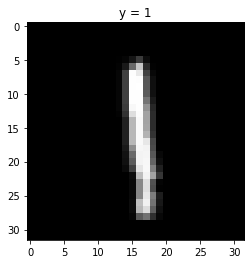

In [ ]:
num = 8 #<--- Any number you want 
show_data(train_dataset[num])

## Defining model

選擇GPU進行訓練

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
  print('GPU is avalible.')
  print('Working on:', torch.cuda.get_device_name())
else:
  device = torch.device('cpu')
  print('GPU is not avalible.')
  print('Working on CPU')

**[Try yourself]** 定義 model (堆積木)

In [ ]:
model2 = nn.Sequential(
        #===============START====================
        nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5),


        
        #===================END==================

        )

model2.to(device) # moving to GPU

檢視模型資訊

In [ ]:
from torchsummary import summary
summary(model2, (1, 32, 32))

定義訓練函式

In [ ]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
  N_test=len(validation_dataset)
  N_train=len(train_dataset)
  train_acc=[] 
  cv_acc=[]   
  train_loss=[] 
  cv_loss=[]   

  for epoch in tqdm(range(n_epochs)):
    #training=============================================
    training_loss = []
    correct = 0
    model.train() # switch model to train mode
    for x, y in train_loader:
      x, y = x.to(device), y.to(device)
      optimizer.zero_grad()
      z = model(x)
      _, yhat = torch.max(z.data, 1)
      correct += (yhat == y).sum().item()
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
      training_loss.append(loss.item()) 
    train_loss.append(np.mean(training_loss))
    train_acc.append(correct / N_train)

    #validation===========================================
    training_loss = []
    correct = 0
    model.eval() # switch model to train mode
    with torch.no_grad(): 
      for x_test, y_test in validation_loader:
        x_test, y_test= x_test.to(device), y_test.to(device)
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
        loss = criterion(z, y_test)
        training_loss.append(loss.item())
      cv_loss.append(np.mean(training_loss))
      cv_acc.append(correct / N_test)
     
  return  train_acc, cv_acc, train_loss, cv_loss

定義超參數(hyper paeameters):
- loss function
- learning rate
- optimizer
- batch size

DataLoader 用來將資料丟入model，batch_size用來決定一次丟入多少個data進model



In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1024)

In [ ]:
train_acc, cv_acc, train_loss, cv_loss = train_model(model=model2,n_epochs=4,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

## Learning curve

In [ ]:
plt.plot(train_acc,label='train_acc')
plt.plot(cv_acc ,label='cv_acc')
plt.title('train / valid  accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
#axes = plt.gca()
#axes.set_ylim([0.4, 1])
plt.legend()
plt.grid()
plt.show()

plt.plot(train_loss,label='train_cost')
plt.plot(cv_loss,label='cv_acc')
plt.title('train / valid  loss')
plt.xlabel('epochs')
plt.ylabel('loss')
#axes = plt.gca()
#axes.set_ylim([0, 1])
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('[Training] ACC:',train_acc[-1])
print('[Training] LOSS:',train_loss[-1])
print('-'*10)
print('[Test] ACC:',cv_acc[-1])
print('[Test] LOSS:',cv_loss[-1])

# [Part III] 建立自己的CNN模型

試著自己拚出一個 model，須注意每一層的輸出維度!<br>

公式: New_image_size = (image_size - kernel_size)/stride + 1

嘗試使用:
- nn.Conv2d
- nn.AvgPool2d / nn.MaxPool2d
- nn.Batchnorm
- nn.ReLU / nn.Tanh() / nn.sigmoid()
- nn.Linear
- nn.Flatten()

更多資訊請看官方說明 <a href="https://pytorch.org/docs/stable/nn.html">torch.nn</a>

**[Try yourself]** 建立 model

In [ ]:
my_model = nn.Sequential(
    
        # modify yourself
        # image size: 32 * 32

        # e.g 
        #   nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5),
        #   nn.MaxPool2d(kernel_size=2),
        #   nn.Flatten(),
        #   nn.Linear(1176,10)
        #============================START================================
        nn.Conv2d(#modify here),

        #==============================END==============================
        )

my_model.to(device)

In [ ]:
from torchsummary import summary
summary(my_model, (1, 32, 32))

**[Try yourself]** 定義超參數

試著更換:
- learning_rate
- optimizer
- batch_size

<a href="https://pytorch.org/docs/stable/optim.html">pytorch: optimizer</a>

In [ ]:
# modify yourself

# e.g 
# learning_rate = 0.0005
# optimizer = torch.optim.Adam(my_model.parameters(), lr=learning_rate)
# train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64)
# validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1024)

#============================START================================
learning_rate = #modify here
optimizer = #modify here
train_loader torch.utils.data.DataLoader(dataset=train_dataset, batch_size= #modify here )
#==============================END==============================

criterion = nn.CrossEntropyLoss()
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1024)

In [ ]:
train_acc, cv_acc, train_loss, cv_loss = train_model(model=my_model,n_epochs=4,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

### Learning curve

In [ ]:
plt.plot(train_acc,label='train_acc')
plt.plot(cv_acc ,label='cv_acc')
plt.title('train / valid  accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
#axes = plt.gca()
#axes.set_ylim([0.4, 1])
plt.legend()
plt.grid()
plt.show()

plt.plot(train_loss,label='train_cost')
plt.plot(cv_loss,label='cv_acc')
plt.title('train / valid  loss')
plt.xlabel('epochs')
plt.ylabel('loss')
#axes = plt.gca()
#axes.set_ylim([0, 1])
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('[Training] ACC:',train_acc[-1])
print('[Training] LOSS:',train_loss[-1])
print('-'*10)
print('[Test] ACC:',cv_acc[-1])
print('[Test] LOSS:',cv_loss[-1])

# AlexNet(optional)

**AlexNet 架構:**

<img src="https://miro.medium.com/max/3072/1*qyc21qM0oxWEuRaj-XJKcw.png" width="80%">

此部分在預處理時，有將先MNIST轉成RGB channel，並且對圖片做正規化處理，有興趣可以參考前處理的程式碼。


參考資料:
- [Pytorch|AlexNet](https://pytorch.org/hub/pytorch_vision_alexnet/)
- [原始論文](http://www.cs.toronto.edu/~hinton/absps/imagenet.pdf)

## 資料準備與前處理

In [ ]:
import torch  # pytorch
torch.manual_seed(0) # keep random seed
import torch.nn as nn
import torchvision.transforms as transforms # image processing module
import torchvision.datasets as dsets # dataset
import matplotlib.pylab as plt # plot module
import numpy as np # matrix module
from tqdm.notebook import tqdm # 顯示進度條

In [ ]:
def show_data(data_sample):
    image = data_sample[0].numpy().reshape(3, IMAGE_SIZE, IMAGE_SIZE)
    image = np.transpose(image, axes=[1, 2, 0])
    plt.imshow(image)
    plt.title('y = '+ str(data_sample[1]))

In [ ]:
IMAGE_SIZE = 224 # Original size: 28

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                          transforms.ToTensor(),
                          transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

In [ ]:
print('Length of train_dataset:', len(train_dataset))
print('Length of validation_dataset:', len(validation_dataset))

檢視MNIST圖片

In [ ]:
num = 8 #<--- Any number you want 
show_data(train_dataset[num])

## Defining model

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
  print('GPU is avalible.')
  print('Working on:', torch.cuda.get_device_name())
else:
  device = torch.device('cpu')
  print('GPU is not avalible.')
  print('Working on CPU')

**[Try yourself]** 定義model (堆積木)

In [ ]:
class AlexNet(nn.Module):
    # Contructor
    def __init__(self):
        super(AlexNet, self).__init__()
        self.feature = nn.Sequential(
        #==================START========================


        #===================END=========================
        )
    # Prediction
    def forward(self, x):
        x = self.feature(x)
        return x

model = AlexNet()

model.to(device) # moving to GPU

In [ ]:
from torchsummary import summary
summary(model, (3, 224, 224))

In [ ]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
  N_test=len(validation_dataset)
  N_train=len(train_dataset)
  train_acc=[] 
  cv_acc=[]   
  train_loss=[] 
  cv_loss=[]   

  for epoch in tqdm(range(n_epochs)):
    #training=============================================
    training_loss = []
    correct = 0
    model.train() # switch model to train mode
    for x, y in train_loader:
      x, y = x.to(device), y.to(device)
      optimizer.zero_grad()
      z = model(x)
      _, yhat = torch.max(z.data, 1)
      correct += (yhat == y).sum().item()
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
      training_loss.append(loss.item()) 
    train_loss.append(np.mean(training_loss))
    train_acc.append(correct / N_train)

    #validation===========================================
    training_loss = []
    correct = 0
    model.eval() # switch model to train mode
    with torch.no_grad(): 
      for x_test, y_test in validation_loader:
        x_test, y_test= x_test.to(device), y_test.to(device)
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
        loss = criterion(z, y_test)
        training_loss.append(loss.item())
      cv_loss.append(np.mean(training_loss))
      cv_acc.append(correct / N_test)
     
  return  train_acc, cv_acc, train_loss, cv_loss

In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=256)

In [ ]:
train_acc, cv_acc, train_loss, cv_loss = train_model(model=model,n_epochs=4,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

## Learning curve

In [ ]:
plt.plot(train_acc,label='train_acc')
plt.plot(cv_acc ,label='cv_acc')
plt.title('train / valid  accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
#axes = plt.gca()
#axes.set_ylim([0.4, 1])
plt.legend()
plt.grid()
plt.show()

plt.plot(train_loss,label='train_cost')
plt.plot(cv_loss,label='cv_acc')
plt.title('train / valid  loss')
plt.xlabel('epochs')
plt.ylabel('loss')
#axes = plt.gca()
#axes.set_ylim([0, 1])
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('[Training] ACC:',train_acc[-1])
print('[Training] LOSS:',train_loss[-1])
print('-'*10)
print('[Test] ACC:',cv_acc[-1])
print('[Test] LOSS:',cv_loss[-1])

# VGG16(homework)

**VGG16D欄位)架構:**

<img src="https://neurohive.io/wp-content/uploads/2018/11/Capture-564x570.jpg" width="50%" >
<hr>

**圖形化架構:**

<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width="80%" >
<hr>

此部分在預處理時，有將先MNIST轉成RGB channel，並且對圖片做正規化處理，有興趣可以參考前處理的程式碼。

參考資料:
- [Pytorch|vgg-nets](https://pytorch.org/hub/pytorch_vision_vgg/)
- [原始論文](https://arxiv.org/abs/1409.1556)


**[注意]** 訓練VGG-16需要花費一定時間，一個 epoch 約為 25 分鐘(batch_size=128)

## 資料準備與前處理

In [ ]:
import torch  # pytorch
torch.manual_seed(0) # keep random seed
import torch.nn as nn
import torchvision.transforms as transforms # image processing module
import torchvision.datasets as dsets # dataset
import matplotlib.pylab as plt # plot module
import numpy as np # matrix module
from tqdm.notebook import tqdm # 顯示進度條

In [ ]:
def show_data(data_sample):
    image = data_sample[0].numpy().reshape(3, IMAGE_SIZE, IMAGE_SIZE)
    image = np.transpose(image, axes=[1, 2, 0])
    plt.imshow(image)
    plt.title('y = '+ str(data_sample[1]))

In [ ]:
IMAGE_SIZE = 224 # Original size: 28

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                          transforms.ToTensor(),
                          transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

In [ ]:
print('Length of train_dataset:', len(train_dataset))
print('Length of validation_dataset:', len(validation_dataset))

檢視MNIST圖片

In [ ]:
num = 8 #<--- Any number you want 
show_data(train_dataset[num])

## Defining model

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
  print('GPU is avalible.')
  print('Working on:', torch.cuda.get_device_name())
else:
  device = torch.device('cpu')
  print('GPU is not avalible.')
  print('Working on CPU')

**[Try yourself]** 定義model (堆積木)

In [ ]:
class VGG16(nn.Module):
    # Contructor
    def __init__(self):
        super(VGG16, self).__init__()

        self.feature = nn.Sequential(
            #=======================START=====================
            nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            #try yourself


            #========================END======================
            )

        
    # Prediction
    def forward(self, x):
        x = self.feature(x)
        return x

model = VGG16()

model.to(device) # moving to GPU

In [ ]:
from torchsummary import summary
summary(model, (3, 224, 224))

In [ ]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
  N_test=len(validation_dataset)
  N_train=len(train_dataset)
  train_acc=[] 
  cv_acc=[]   
  train_loss=[] 
  cv_loss=[]   

  for epoch in tqdm(range(n_epochs)):
    #training=============================================
    training_loss = []
    correct = 0
    model.train() # switch model to train mode
    for x, y in train_loader:
      x, y = x.to(device), y.to(device)
      optimizer.zero_grad()
      z = model(x)
      _, yhat = torch.max(z.data, 1)
      correct += (yhat == y).sum().item()
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
      training_loss.append(loss.item()) 
    train_loss.append(np.mean(training_loss))
    train_acc.append(correct / N_train)

    #validation===========================================
    training_loss = []
    correct = 0
    model.eval() # switch model to train mode
    with torch.no_grad(): 
      for x_test, y_test in validation_loader:
        x_test, y_test= x_test.to(device), y_test.to(device)
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
        loss = criterion(z, y_test)
        training_loss.append(loss.item())
      cv_loss.append(np.mean(training_loss))
      cv_acc.append(correct / N_test)
     
  return  train_acc, cv_acc, train_loss, cv_loss

In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=256)

[注意] 訓練VGG-16需要花費一定時間，一個 epoch 約為 25 分鐘(batch_size=128)

In [ ]:
train_acc, cv_acc, train_loss, cv_loss = train_model(model=model,n_epochs=4,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

## Learning curve

In [ ]:
plt.plot(train_acc,label='train_acc')
plt.plot(cv_acc ,label='cv_acc')
plt.title('train / valid  accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
#axes = plt.gca()
#axes.set_ylim([0.4, 1])
plt.legend()
plt.grid()
plt.show()

plt.plot(train_loss,label='train_cost')
plt.plot(cv_loss,label='cv_acc')
plt.title('train / valid  loss')
plt.xlabel('epochs')
plt.ylabel('loss')
#axes = plt.gca()
#axes.set_ylim([0, 1])
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('[Training] ACC:',train_acc[-1])
print('[Training] LOSS:',train_loss[-1])
print('-'*10)
print('[Test] ACC:',cv_acc[-1])
print('[Test] LOSS:',cv_loss[-1])

# 參考答案

## LeNet-5

In [ ]:
# Method 1
model2 = nn.Sequential(
          nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5),
          nn.AvgPool2d(kernel_size=2),
          nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5),
          nn.AvgPool2d(kernel_size=2),
          nn.Flatten(),

          nn.Linear(5*5*16,120),
          nn.Tanh(),

          nn.Linear(120,84),
          nn.Tanh(),

          nn.Linear(84,10),
        )

'''
# Method2
class CNN(nn.Module):
    # Contructor
    def __init__(self, out_1=6, out_2=16):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5)
        self.avgpool = nn.AvgPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.tanh = nn.Tanh()
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    # Prediction
    def forward(self, x):
        x = self.avgpool(self.conv1(x))
        x = self.avgpool(self.conv2(x))
        x = self.flatten(x)
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.fc3(x)

        return x

model2 = CNN(out_1=6, out_2=16)
'''

model2.to(device) # moving to GPU

## AlexNet

In [ ]:
class AlexNet(nn.Module):
    # Contructor
    def __init__(self,out):
        super(AlexNet, self).__init__()
        self.out = out
        self.feature = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
        )
        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(6, 6))
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(in_features=9216, out_features=4096, bias=True),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(in_features=4096, out_features=4096, bias=True),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=4096, out_features=self.out, bias=True)
        )
    # Prediction
    def forward(self, x):
        x = self.feature(x)
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

model = AlexNet(10)

model.to(device) # moving to GPU

## VGG16

In [ ]:
class VGG16(nn.Module):
    # Contructor
    def __init__(self,out):
        super(VGG16, self).__init__()
        self.out = out
        self.feature = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

        )
        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(7, 7))
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(in_features=25088, out_features=4096, bias=True),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(in_features=4096, out_features=4096, bias=True),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(in_features=4096, out_features=out, bias=True)
            )       
  
    def forward(self, x):
        x = self.feature(x)
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

model = VGG16(10)

model.to(device) # moving to GPU